<a href="https://colab.research.google.com/github/Shohei496/Deep-met/blob/circleci-project-setup/step2%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A1%E3%83%88%E3%83%AA%E3%83%83%E3%82%AF%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%E3%80%90%E3%83%88%E3%83%AC%E3%83%BC%E3%83%8A%E3%83%BC%E3%80%91_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#0
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1

import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd
from scipy.signal import fftconvolve

In [ ]:
#2

# define directories

base_dir = "drive/MyDrive/"
esc_dir = os.path.join(base_dir, "data")
audio_dir = os.path.join(esc_dir, "audio/Filter/")
meta_file = os.path.join(esc_dir, "meta/meta_data.csv")#正常メタデータ
#meta_file2 = os.path.join(esc_dir, "meta/meta_data.csv")#異常メタデータ

In [ ]:
#3

# モデルの種類

M = 1     #オリジナルモデル=0  学習済みモデル=1 を入力 

In [ ]:
#4

# load metadata
meta_data = pd.read_csv(meta_file, encoding="shift-jis")
meta_data

,filename,target
0,10a1.wav のコピー,0
1,a2.wav のコピー,0
2,a3.wav のコピー,0
3,a4.wav のコピー,0
4,a5.wav のコピー,0
...,...,...
242,8:45.wav のコピー,3
243,8:46.wav のコピー,3
244,8:47.wav のコピー,3
245,8:48.wav のコピー,3


In [ ]:
#5

# get data size
data_size = meta_data.shape
print(data_size)

(247, 2)


In [ ]:
#6

# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    x = x[0:160000]
    max_data = np.max(x)
    min_data = np.min(x)
    x = (x-min_data)/(max_data-min_data)
   # x = (x-min_data)/(max_data-min_data+1e-6)
   # return _x-0.5
    return x,fs

In [ ]:
#7

# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    #log_stft = librosa.power_to_db(log_stft)
    melsp = log_stft
    #melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [ ]:
#8

# display wave in plots
def show_wave(x):
    plt.plot(x)
    #plt.figure(figsize=(5,4))

    plt.show()

In [ ]:
#9

# display wave in heatmap
def show_melsp(melsp, fs):
    #librosa.display.specshow(melsp, sr=fs)
    plt.figure(figsize=(20,4))
    plt.imshow(melsp)
    #plt.imshow(melsp, interpolation='nearest',vmin=0,vmax=30,cmap='jet')
    plt.colorbar()
    plt.show()

wave size:(160000,)
melsp size:(513, 1251)
samping rate:44100


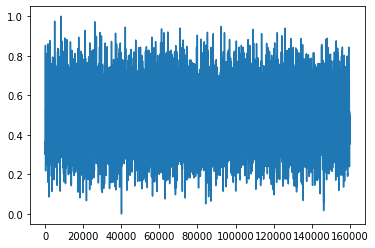

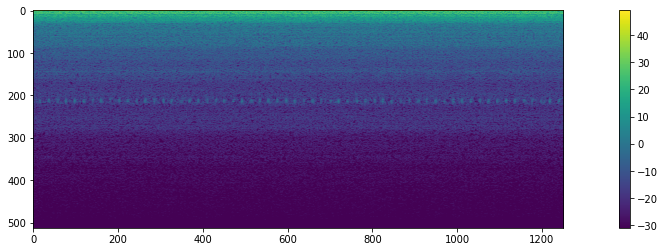

In [ ]:
#10

# example data
x, fs = load_wave_data(audio_dir, meta_data.loc[1,"filename"])
melsp = calculate_melsp(x)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x)
show_melsp(melsp, fs)

In [ ]:
#11

# data augmentation: shift sound in timeframe
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

def shift_sound1(x, rate=3):
    return np.roll(x, int(len(x)//rate))

def shift_sound2(x, rate=4):
    return np.roll(x, int(len(x)//rate))

def shift_sound3(x, rate=5):
    return np.roll(x, int(len(x)//rate))

wave size:(160000,)
melsp size:(513, 1251)
samping rate:44100


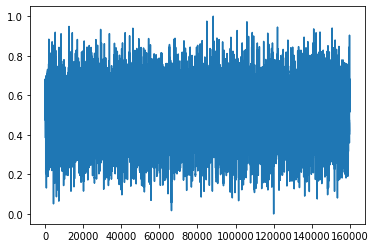

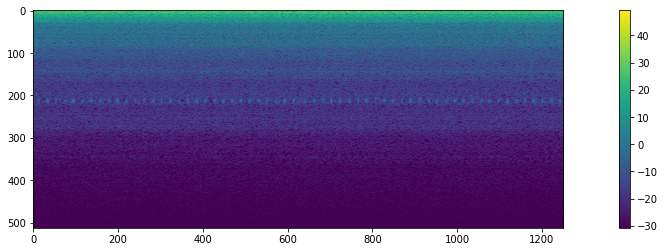

wave size:(160000,)
melsp size:(513, 1251)
samping rate:44100


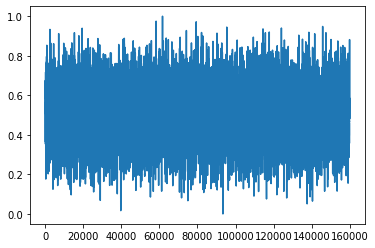

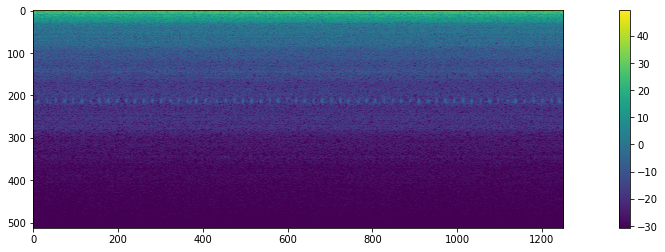

wave size:(160000,)
melsp size:(513, 1251)
samping rate:44100


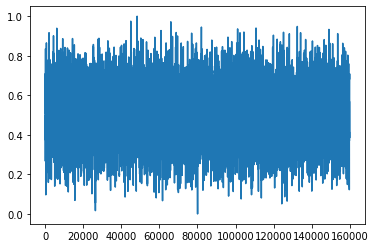

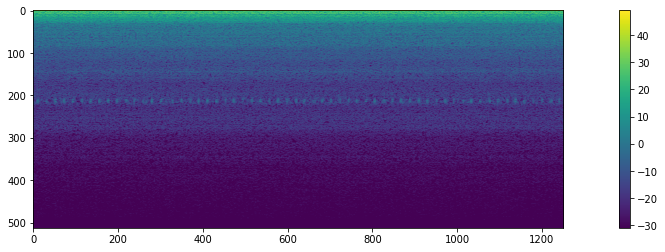

wave size:(160000,)
melsp size:(513, 1251)
samping rate:44100


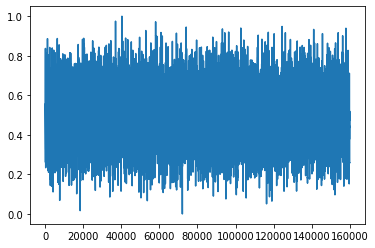

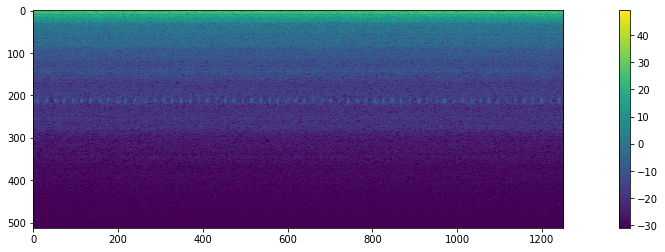

In [ ]:
#12

x_ss = shift_sound(x)
melsp = calculate_melsp(x_ss)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_ss.shape, melsp.shape, fs))
show_wave(x_ss)
show_melsp(melsp, fs)

x_ss1 = shift_sound1(x)
melsp = calculate_melsp(x_ss1)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_ss1.shape, melsp.shape, fs))
show_wave(x_ss1)
show_melsp(melsp, fs)

x_ss2 = shift_sound2(x)
melsp = calculate_melsp(x_ss2)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_ss2.shape, melsp.shape, fs))
show_wave(x_ss2)
show_melsp(melsp, fs)

x_ss3 = shift_sound3(x)
melsp = calculate_melsp(x_ss3)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_ss3.shape, melsp.shape, fs))
show_wave(x_ss3)
show_melsp(melsp, fs)

In [ ]:
#13

# data augmentation: stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

def stretch_sound1(x, rate=1.2):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

wave size:(160000,)
melsp size:(513, 1251)
samping rate:44100


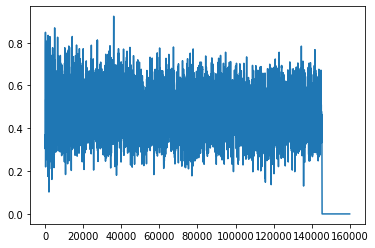

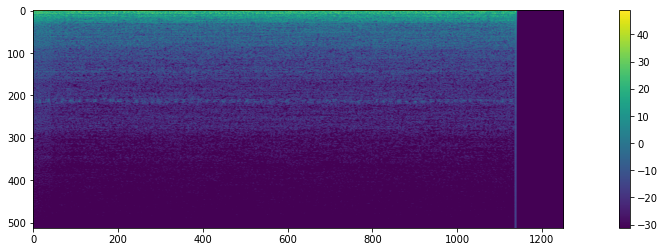

wave size:(160000,)
melsp size:(513, 1251)
samping rate:44100


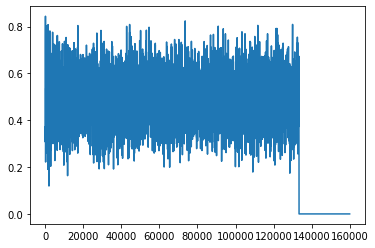

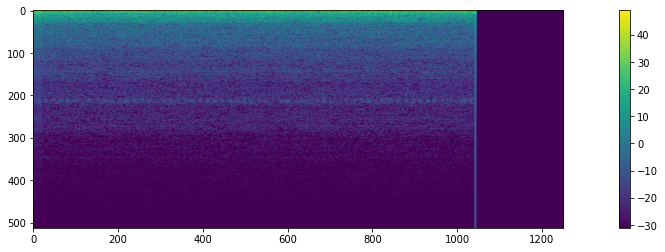

In [ ]:
#14

x_st = stretch_sound(x)
melsp = calculate_melsp(x_st)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_st.shape, melsp.shape, fs))
show_wave(x_st)
show_melsp(melsp, fs)

x_st = stretch_sound1(x)
melsp = calculate_melsp(x_st)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_st.shape, melsp.shape, fs))
show_wave(x_st)
show_melsp(melsp, fs)

In [ ]:
#15

# get training dataset and target dataset
x = list(meta_data.loc[:,"filename"])
y = list(meta_data.loc[:, "target"])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, stratify=y)
print("x train:{0}\ny train:{1}\nx test:{2}\ny test:{3}".format(len(x_train),
                                                                len(y_train), 
                                                                len(x_test), 
                                                                len(y_test)))

x train:185
y train:185
x test:62
y test:62


In [ ]:
#16

freq = 513
time = 1251

In [ ]:
#17

# save wave data in npz, with augmentation
def save_np_data(filename, x, y, aug=None, rates=None):
    np_data = np.zeros(freq*time*len(x)).reshape(len(x), freq, time)
    np_targets = np.zeros(len(y))
    for i in range(len(y)):
        _x, fs = load_wave_data(audio_dir, x[i])
        if aug is not None:
            _x = aug(x=_x, rate=rates[i])
        _x = calculate_melsp(_x)
        #_x = show_melsp(_x, fs)
        np_data[i] = _x
        

        np_targets[i] = y[i]
    np.savez(filename, x=np_data, y=np_targets)

In [ ]:
#18

# save test dataset
if not os.path.exists("esc_melsp_test.npz"):
    save_np_data("esc_melsp_test.npz", x_test,  y_test)
    #np.savez("esc_melsp_test.npz",x=x_test,y=y_test)

In [ ]:
#19

# save raw training dataset
if not os.path.exists("esc_melsp_train_raw.npz"):
    save_np_data("esc_melsp_train_raw.npz", x_train,  y_train)
    #np.savez("esc_melsp_test.npz",x=x_test,y=y_test)

In [ ]:
#20

# save training dataset with sound shift
if not os.path.exists("esc_melsp_train_ss.npz"):
    rates = np.random.choice(np.arange(2,2.1),len(y_train))
    rates1 = np.random.choice(np.arange(3,3.1),len(y_train))
    rates2 = np.random.choice(np.arange(4,4.1),len(y_train))
    rates3 = np.random.choice(np.arange(5,5.1),len(y_train))
    save_np_data("esc_melsp_train_ss.npz", x_train,  y_train, aug=shift_sound, rates=rates)
    save_np_data("esc_melsp_train_ss1.npz", x_train,  y_train, aug=shift_sound1, rates=rates)
    save_np_data("esc_melsp_train_ss2.npz", x_train,  y_train, aug=shift_sound2, rates=rates)
    save_np_data("esc_melsp_train_ss3.npz", x_train,  y_train, aug=shift_sound3, rates=rates)

In [ ]:
#21

# save training dataset with stretch
if not os.path.exists("esc_melsp_train_st.npz"):
    rates = np.random.choice(np.arange(110,111),len(y_train))/100
    rates = np.random.choice(np.arange(120,121),len(y_train))/100
    save_np_data("esc_melsp_train_st.npz", x_train,  y_train, aug=stretch_sound, rates=rates)
    save_np_data("esc_melsp_train_st1.npz", x_train,  y_train, aug=stretch_sound1, rates=rates)

In [ ]:
#22

!pip install pytorch-metric-learning
!pip install faiss-gpu

     |████████████████████████████████| 107 kB 8.7 MB/s 
     |████████████████████████████████| 85.5 MB 109 kB/s 


In [ ]:
#23

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from pytorch_metric_learning import distances, losses, miners, reducers, testers
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
from pytorch_metric_learning.utils import common_functions

In [ ]:
#24

freq = 513
time = 1251
train_num = len(x_train)
test_num = len(x_test)

In [ ]:
#25

train_files =["esc_melsp_train_raw.npz","esc_melsp_train_ss.npz","esc_melsp_train_ss1.npz","esc_melsp_train_ss2.npz","esc_melsp_train_ss3.npz","esc_melsp_train_st.npz","esc_melsp_train_st1.npz"]
test_file =  "esc_melsp_test.npz"

In [ ]:
#26

test_data = np.load(test_file)

test_data_x = torch.from_numpy(test_data["x"]).float()
test_data_y = torch.from_numpy(test_data["y"]).long()


train_data_x = torch.zeros(freq*time*train_num*len(train_files)).reshape(train_num*len(train_files), freq, time)
train_data_y = torch.zeros(train_num*len(train_files))

In [ ]:
#27

for i in range(len(train_files)):
    train_data = np.load(train_files[i])

    
    train_data_x[i*train_num:(i+1)*train_num] = torch.from_numpy(train_data["x"]).float()
    train_data_y[i*train_num:(i+1)*train_num] = torch.from_numpy(train_data["y"]).long()

In [ ]:
#28

mean = torch.mean(train_data_x, axis=0)
std = torch.std(train_data_x, axis=0)

train_data_x = (train_data_x - mean)/std
train_data_x = train_data_x.unsqueeze(1)

test_data_x = (test_data_x - mean)/std
test_data_x = test_data_x.unsqueeze(1)

In [ ]:
#29

test_datas = torch.utils.data.TensorDataset(test_data_x, test_data_y)

train_datas = torch.utils.data.TensorDataset(train_data_x, train_data_y)


In [ ]:
#30

from torchvision import models
from torchvision.models import resnet50

In [ ]:
#31

if M < 1:

#####オリジナルモデルVer

  model=models.resnet50()
  resnet_model=model
  resnet_model.fc = common_functions.Identity()
  resnet_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

#resnet_model_output_size = model.fc.in_features

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  resnet_model = torch.nn.DataParallel(resnet_model.to(device))
  resnet_model.load_state_dict(torch.load('drive/MyDrive/data/model/models.pth'))
#resnet_model_output_size = model.fc.in_features

else:
###学習済みモデルVer
#from torchvision.models import resnet50
# 学習済みのResNetをダウンロード
     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
     resnet_model = resnet50(pretrained=True)
     resnet_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
     resnet_model_output_size = resnet_model.fc.in_features
     resnet_model.fc = common_functions.Identity()
     resnet_model = torch.nn.DataParallel(resnet_model.to(device))



Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
#32

train_loader = DataLoader(train_datas ,batch_size=10, shuffle=True)
def train(model, loss_func, mining_func, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        #data = data.unsqueeze(1)
        embeddings = model(data)
        indices_tuple = mining_func(embeddings, labels)
        loss = loss_func(embeddings, labels, indices_tuple)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(
                "Epoch {} Iteration {}: Loss = {}, Number of mined triplets = {}".format(
                    epoch, batch_idx, loss, mining_func.num_triplets
                )
            )


### convenient function from pytorch-metric-learning ###
def get_all_embeddings(dataset, model):
    tester = testers.BaseTester()

    return tester.get_all_embeddings(dataset, model)



### compute accuracy using AccuracyCalculator from pytorch-metric-learning ###
def test(train_set, test_set, model, accuracy_calculator):
    
 
    train_embeddings, train_labels = get_all_embeddings(train_set, model)
    test_embeddings, test_labels = get_all_embeddings(test_set, model)
    train_labels = train_labels.squeeze(1)
    test_labels = test_labels.squeeze(1)
    print("Computing accuracy")
    accuracies = accuracy_calculator.get_accuracy(test_embeddings, train_embeddings, test_labels, train_labels, False)
    print("Test set accuracy (Precision@1) = {}".format(accuracies["precision_at_1"]))



device = torch.device("cuda")

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)



dataset1 = train_datas
dataset2 = test_datas
train_loader = train_loader
model = resnet_model
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 1

## pytorch-metric-learning stuff ###
distance = distances.CosineSimilarity()
reducer = reducers.ThresholdReducer(low=0)
loss_func = losses.TripletMarginLoss(margin=1, distance=distance, reducer=reducer)
#loss_func = losses.TripletMarginLoss(margin=1, reducer=reducer)
mining_func = miners.TripletMarginMiner(
#    margin=1, type_of_triplets="semihard"
    margin=1, distance=distance, type_of_triplets="semihard"
)
accuracy_calculator = AccuracyCalculator(include=("precision_at_1",), k=1)
### pytorch-metric-learning stuff ###


for epoch in range(1, num_epochs + 1):
    train(model, loss_func, mining_func, device, train_loader, optimizer, epoch)
    test(dataset1, dataset2, model, accuracy_calculator)


    #_tmp_metrics, _tmp_labels = loss(model, test_loader, epoch)
    #test_predicted_metrics.append(_tmp_metrics)
    #test_true_labels.append(_tmp_labels)

Epoch 1 Iteration 0: Loss = 0.9479146599769592, Number of mined triplets = 101
Epoch 1 Iteration 20: Loss = 0.28551605343818665, Number of mined triplets = 142
Epoch 1 Iteration 40: Loss = 0.48737165331840515, Number of mined triplets = 103
Epoch 1 Iteration 60: Loss = 0.5035384893417358, Number of mined triplets = 70
Epoch 1 Iteration 80: Loss = 0.2162747085094452, Number of mined triplets = 148
Epoch 1 Iteration 100: Loss = 0.35430535674095154, Number of mined triplets = 149
Epoch 1 Iteration 120: Loss = 0.2471175342798233, Number of mined triplets = 106


100%|██████████| 2/2 [00:01<00:00,  1.16it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.8387096774193548


In [ ]:
#33

train_true_metrics = []
train_true_labels = []
train_ng_metrics = []
train_ng_labels = []
test_predicted_metrics = []
test_true_labels = []
test_ng_metrics = []
test_ng_labels = []

train_loader = DataLoader(train_datas ,batch_size=1, shuffle=True)
test_loader = DataLoader(test_datas ,batch_size=1, shuffle=True)
test_loader = test_loader

def train_loss(model, train_loader):
    _predicted_metrics = []
    _true_labels = []
    model.eval()
    with torch.no_grad():    
        for i, (inputs,  labels) in enumerate(train_loader):
           # inputs, labels = inputs.to(device), labels.to(device)
            #inputs  =inputs.squeeze(1)
            metric = model(inputs).detach().cpu().numpy()
            metric = metric.reshape(metric.shape[0], metric.shape[1])
            if labels<1:
               train_true_metrics.append(metric)
               train_true_labels.append(labels.detach().cpu().numpy())
            else:
               train_ng_metrics.append(metric)
               train_ng_labels.append(labels.detach().cpu().numpy())
    return np.concatenate(train_true_metrics), np.concatenate(train_true_labels),np.concatenate(train_ng_metrics), np.concatenate(train_ng_labels)



def loss(model, test_loader):
    _predicted_metrics = []
    _true_labels = []
    model.eval()
    with torch.no_grad():    
        for i, (inputs,  labels) in enumerate(test_loader):
           # inputs, labels = inputs.to(device), labels.to(device)
            metric = model(inputs).detach().cpu().numpy()
            metric = metric.reshape(metric.shape[0], metric.shape[1])
            if labels<1:
               test_predicted_metrics.append(metric)
               test_true_labels.append(labels.detach().cpu().numpy())
            else:
               test_ng_metrics.append(metric)
               test_ng_labels.append(labels.detach().cpu().numpy())
    return np.concatenate(test_predicted_metrics), np.concatenate(test_true_labels),np.concatenate(test_ng_metrics), np.concatenate(test_ng_labels)

train_true_metrics,train_true_labels,train_ng_metrics,train_ng_labels= train_loss(model, train_loader)
test_predicted_metrics,test_true_labels,test_ng_metrics,test_ng_labels= loss(model, test_loader)

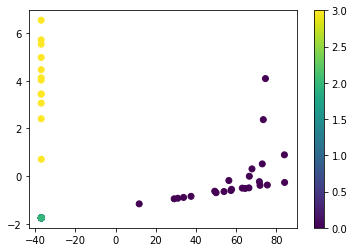

In [ ]:
#34

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
#主成分分析
metrics = np.vstack((test_predicted_metrics,test_ng_metrics))
metrics_labels = np.hstack((test_true_labels,test_ng_labels))
pca_metrics = PCA(n_components=2, random_state=0).fit_transform(metrics)
plt.scatter(pca_metrics[:, 0], pca_metrics[:, 1], c=metrics_labels)
#plt.scatter(pca_metrics[:, 0], pca_metrics[:, 1], c=plus_true_labels[-1])
plt.colorbar()
plt.savefig("output.png")
plt.show()

In [ ]:
#35

#####データ保存
import csv
torch.save(resnet_model.state_dict(),  'drive/MyDrive/data/model/models.pth')#####モデル保存



metrics2 = np.vstack((test_predicted_metrics,train_true_metrics))
label2=  np.hstack((test_true_labels,train_true_labels))

np.save('drive/MyDrive/data/met/met.npy', metrics2)#####正常データ保存
np.save('drive/MyDrive/data/met/lab.npy', label2)